### 1. Import the required libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, silhouette_score, confusion_matrix, classification_report


### 2. Import the Dataset

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df_new = df.copy()
# make a copy of the dataset 

### Description about features 

* Dataset consist of 10 numerical and 8 categorical features.

* 'Revenue' is used as a class label.


* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.



* The feature 'Bounce Rate' for a web page refers to the %age of visitors who enter the site from that page and leave('bounce') without triggering any request.



* 'Page Value' feature represents the avg. value for a web page that user visited before completing the transaction.



* 'Exit Rate' it is calculated as for all the pageviews to the page for all the pageviews to the page. 

### 3. Outliers in the Dataset 

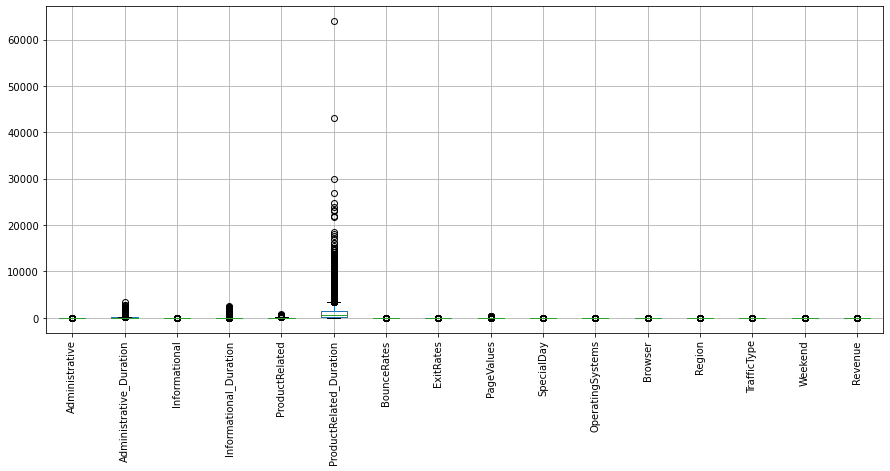

In [4]:
plt.figure(figsize = (15,6))
df_new.boxplot()
plt.xticks(rotation = 90)
plt.show()

* Most of the outliers are present in the **ProductRelated_Duration**

### 4. Null Values present in the dataset 

In [5]:
df_new.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

* There are no null values present in the dataset 

In [ ]:
df_new['Revenue'] = [1 if i == True else 0 for i in df_new['Revenue']]

### Categorical Variables 

In [6]:
categorical_cols = df_new.select_dtypes(include = object)

In [7]:
categorical_cols.columns

Index(['Month', 'VisitorType'], dtype='object')

### Numerical Variables 

In [8]:
numerical_cols = df_new.select_dtypes(include = np.number)

In [9]:
numerical_cols.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

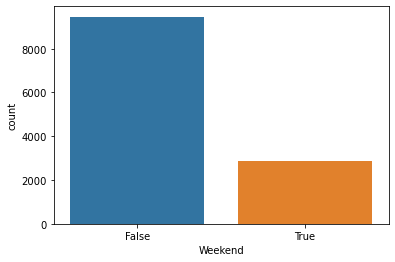

In [43]:
sns.countplot(x = df_new['Weekend'])
plt.show()

* Inference: Most of the people visited the website on weekdays 

C:\Users\Arpit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


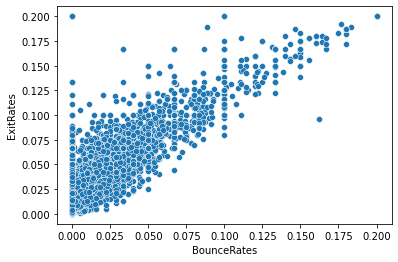

In [47]:
sns.scatterplot(df_new['BounceRates'], df_new['ExitRates'])
plt.show()

* Bounce Rate and Exit Rate have very positive correlation 

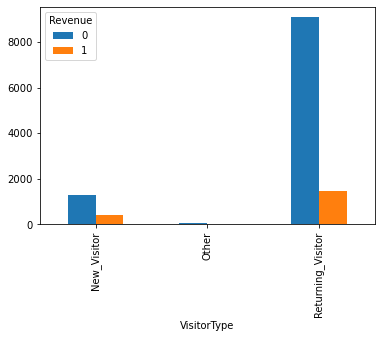

In [87]:
pd.crosstab(df_new['VisitorType'], df_new['Revenue']).plot(kind = 'bar')
plt.show()

* 'Others' category of visitors doesn't generate revenue at all 
* Only few visitors from 'Returning Visitor'  and 'New Visitor' category generates revenue. 

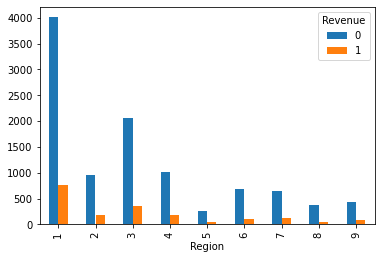

In [91]:
pd.crosstab(df_new['Region'], df_new['Revenue']).plot(kind = 'bar')
plt.show()

* Most of the customers who have generated revenue belong to Region 1 
* Least number of customers who have generated revenue also belongs to Region 1

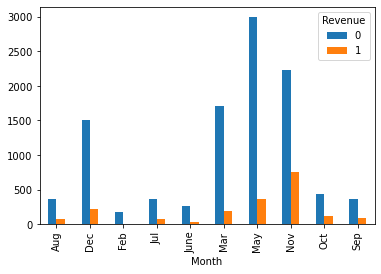

In [99]:
pd.crosstab(df_new['Month'], df_new['Revenue']).plot(kind = 'bar')
plt.show()

* Most of the revenue is generated in the month of November 
* Least revenue is generated in the month of May 

### Train, Test Split and Scaling of Data

In [11]:
X = df_new.drop('Revenue', axis = 1)
y = df_new['Revenue']

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 2, stratify = y)

In [111]:
# fit_transform on train , numerical columns
ss = StandardScaler()
num_cols_train = x_train.select_dtypes(np.number)

num_train = pd.DataFrame(ss.fit_transform(x_train.select_dtypes(np.number)), columns = num_cols_train.columns)

In [112]:
# pd.get_dummies on x_train columns 
cat_cols_train = x_train.select_dtypes(exclude = np.number)
cat_train = pd.get_dummies(cat_cols_train, drop_first = True).reset_index(drop = True)

In [113]:
x_train = pd.concat([num_train, cat_train], axis = 1)

In [114]:
# transform on test, numerical columns 
num_cols_test = x_test.select_dtypes(np.number)
num_test = pd.DataFrame(ss.transform(x_test.select_dtypes(np.number)), columns = num_cols_train.columns)

In [115]:
# pd.get_dummies on x_test columns 
cat_cols_test = x_test.select_dtypes(exclude = np.number)
cat_test = pd.get_dummies(cat_cols_test, drop_first = True).reset_index(drop = True)

In [116]:
x_test = pd.concat([num_test, cat_test], axis = 1)

In [117]:
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((8631, 26), (3699, 26), (8631,), (3699,))

## Base Model 

In [118]:
lr = LogisticRegression()
model_base = lr.fit(x_train, y_train)
y_pred_b = model_base.predict(x_test)

In [119]:
print('Accuracy Score:',round(accuracy_score(y_test, y_pred_b),2))

Accuracy Score: 0.89


### Applying PCA

In [122]:
# pca using all the components 
pca = PCA()

In [123]:
pca.fit(x_train)

PCA()

In [124]:
total = sum(pca.explained_variance_)

In [125]:
exp_var = [ (i/total)*100 for i in sorted(pca.explained_variance_, reverse = True)]

In [127]:
cum_var = np.cumsum(exp_var)

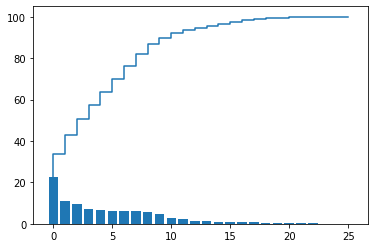

In [128]:
plt.bar(range(26), exp_var)
plt.step(range(26),cum_var)

In [129]:
cum_var
# almost 92% of the variance is explained by first 12 components 
# so let's apply PCA using 12 components

array([ 22.54833122,  33.69992439,  43.05400944,  50.37972263,
        57.23864724,  63.6521249 ,  70.03888849,  76.16686135,
        81.93451745,  86.81764848,  89.69671872,  92.00297277,
        93.38080082,  94.55562054,  95.65749217,  96.65625169,
        97.53147529,  98.26888604,  98.76967806,  99.17972711,
        99.4423066 ,  99.67175527,  99.83403089,  99.94337176,
        99.97691128, 100.        ])

In [130]:
x_train.shape

(8631, 26)

### PCA using 8 components

In [151]:
pca_1 = PCA(n_components= 8)
pca_train = pca_1.fit_transform(x_train)
exp_var_1 = [ (i/total)*100 for i in sorted(pca_1.explained_variance_, reverse = True)]

# 8 PC components can be used instead of using 26 columns 
# Thus, curse of dimensionality is reduced

In [152]:
pca_test = pca_1.transform(x_test)

### Base Model using Logistic Regression 

In [153]:
lr_1 = LogisticRegression()
model_pca = lr_1.fit(pca_train, y_train)
y_pred_pca = model_pca.predict(pca_test)

In [154]:
print('Accuracy Score using 8 PC Components:',round(accuracy_score(y_test, y_pred_pca),2))

Accuracy Score using 8 PC Components: 0.88


* So, instead of using 26 features, we can use only 8 PC components, and yet get the good accuracy.

In [212]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3127
           1       0.74      0.35      0.47       572

    accuracy                           0.88      3699
   macro avg       0.81      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699



* We can use f1-score as evaluation metric, which gives a harmonic mean of Precision and recall.

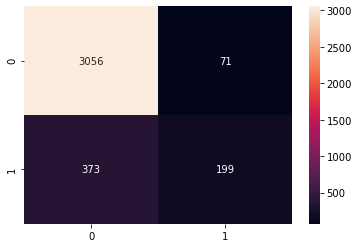

In [219]:
sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot = True, fmt = 'd')
plt.show()
# 71 , revenue not generated but model predicted, that the revenue was generated ---> False Positive 
# 373 generated revenue , but model predicted, that the revenue was not generated. --> False Negative 

### kmeans clustering , find optimum number of clusters using Elbow Method

In [155]:
pca_df = pd.DataFrame(pca_train)
# make a PCA DataFrame 

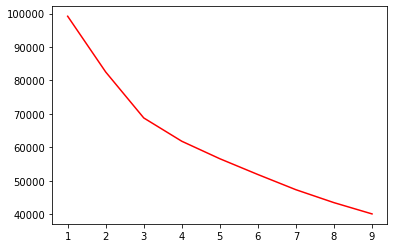

In [156]:
cluster_range = range(1,20)
cluster_errors = []
inertia=[] # empty list

for k in range(1,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10),inertia,color='red')  
plt.show()

* **Appropriate number of clusters = 3, according to Elbow Plot**

In [157]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [158]:
kmeans=KMeans(n_clusters=3)
kmeans_v2=kmeans.fit(pca_df)
print('Silhouette Score:',round(silhouette_score(pca_df,kmeans_v2.labels_),2))
df_pca_kmeans_v2=pca_df.copy()
df_pca_kmeans_v2['label']=kmeans_v2.labels_
print(df_pca_kmeans_v2['label'].value_counts())

Silhouette Score: 0.36
0    6718
2    1162
1     751
Name: label, dtype: int64


## Analysis of clusters 

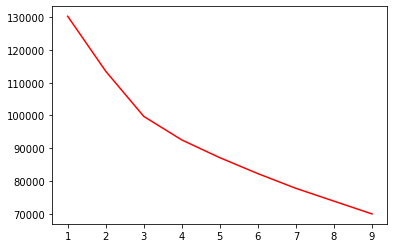

In [202]:
cluster_range = range(1,20)
cluster_errors = []
inertia=[] # empty list

for k in range(1,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x_train)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10),inertia,color='red')  
plt.show()

In [205]:
kmeans=KMeans(n_clusters=3)
kmeans_v1=kmeans.fit(x_train)
print('Silhouette Score:',round(silhouette_score(x_train,kmeans_v1.labels_),2))
df_pca_kmeans_v1=x_train.copy()
df_pca_kmeans_v1['label']=kmeans_v1.labels_
print(df_pca_kmeans_v1['label'].value_counts())

Silhouette Score: 0.28
1    6714
2    1162
0     755
Name: label, dtype: int64


In [206]:
df_pca_kmeans_v1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,label
0,0.805234,0.100670,-0.403497,-0.246661,2.178879,2.573343,-0.457057,-0.798039,1.234358,-0.311213,...,0,0,0,0,1,0,0,0,1,2
1,0.204077,1.913804,-0.403497,-0.246661,-0.634719,-0.569104,-0.457057,-0.658201,-0.317942,-0.311213,...,0,0,1,0,0,0,0,0,0,1
2,-0.697658,-0.454945,-0.403497,-0.246661,-0.542470,-0.337324,0.056047,-0.170295,-0.317942,-0.311213,...,0,0,1,0,0,0,0,0,1,1
3,-0.397080,-0.345791,-0.403497,-0.246661,-0.311847,-0.060552,0.243370,-0.155706,0.664561,-0.311213,...,0,0,0,0,1,0,0,0,1,1
4,-0.096501,-0.336789,-0.403497,-0.246661,-0.104287,-0.262197,-0.310456,-0.593363,-0.317942,3.657870,...,0,0,0,1,0,0,0,0,1,1


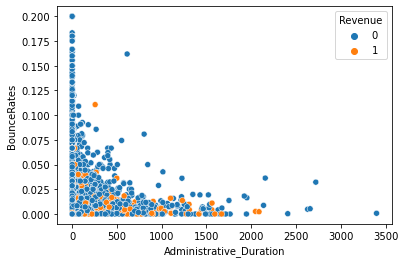

In [208]:

sns.scatterplot(x = df_new['Administrative_Duration'], y = df_new['BounceRates'], hue = df_new['Revenue'])
plt.show()

* Most of the customers doesn't generate any revenue.
* Very less customers, who have low Adminstrative duration and low Bounce Rate, generate the revenue.

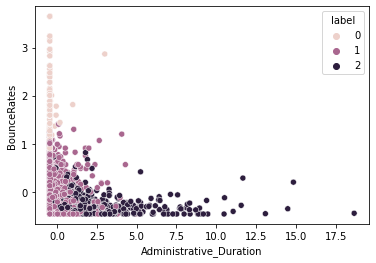

In [207]:
sns.scatterplot(x = df_pca_kmeans_v1['Administrative_Duration'], y = df_pca_kmeans_v1['BounceRates'], hue = df_pca_kmeans_v1['label'])
plt.show()

 * By, Looking at this Clustering plot, we can say that the customers who spent a longer administrative duration in a website are very less likely to bounce from the website. 
 
* Cluster 2 represent the interested customers, who generate the revenue. 

* Cluster 0 represents the General Customers 

* Cluster 1 represents the uninterested customers, who doesn't generate revenue at all.